In [ ]:
pip install nltk pandas matplotlib seaborn scikit-learn

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving product_reviews.csv to product_reviews.csv


In [ ]:
import pandas as pd
df=pd.read_csv("product_reviews.csv")

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

In [ ]:
import nltk

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords

In [ ]:
stop_words=set(stopwords.words('english'))

In [ ]:
import pandas as pd
df=pd.read_csv("product_reviews.csv")

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
def clean_text(text):
    if not isinstance(text, str):  # Skip if not a string
        return ""
    tokens = word_tokenize(text.lower())
    words = [word for word in tokens if word.isalpha() and word not in stop_words]
    return " ".join(words)

df['cleaned'] = df['reviews.date'].apply(clean_text)


In [ ]:
def get_sentiment(rating):
    if rating >= 4:
        return 'positive'
    elif rating <= 2:
        return 'negative'
    else:
        return 'neutral'

df['sentiment'] = df['reviews.rating'].apply(get_sentiment)

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
stop_words = set(stopwords.words('english'))

def clean_text(text):
    if not isinstance(text, str):
        return ""
    tokens = word_tokenize(text.lower())
    words = [word for word in tokens if word.isalpha() and word not in stop_words]
    return " ".join(words)

df['cleaned'] = df['reviews.text'].apply(clean_text)


In [ ]:
def get_sentiment(rating):
    if rating >= 4:
        return 'positive'
    elif rating <= 2:
        return 'negative'
    else:
        return 'neutral'

df['sentiment'] = df['reviews.rating'].apply(get_sentiment)


In [ ]:
# Safe filtering: drop NaN & empty strings
pos_text = " ".join(df[(df['sentiment'] == 'positive') & (df['cleaned'].notnull()) & (df['cleaned'] != "")]['cleaned'])
neg_text = " ".join(df[(df['sentiment'] == 'negative') & (df['cleaned'].notnull()) & (df['cleaned'] != "")]['cleaned'])

# Check before plotting
print("Positive text length:", len(pos_text))
print("Negative text length:", len(neg_text))


Positive text length: 403707
Negative text length: 23810


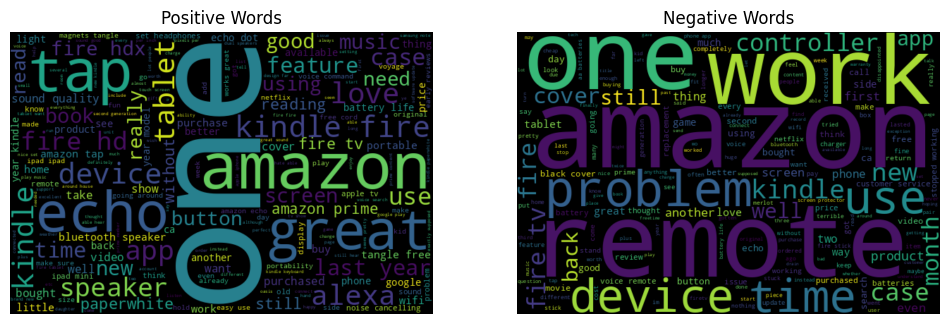

In [ ]:
plt.figure(figsize=(12, 5))

if pos_text:
    plt.subplot(1, 2, 1)
    plt.title("Positive Words")
    plt.imshow(WordCloud(width=600, height=400).generate(pos_text), interpolation='bilinear')
    plt.axis("off")
else:
    print("No positive text found!")

if neg_text:
    plt.subplot(1, 2, 2)
    plt.title("Negative Words")
    plt.imshow(WordCloud(width=600, height=400).generate(neg_text), interpolation='bilinear')
    plt.axis("off")
else:
    print("No negative text found!")

plt.show()


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['cleaned'])

# Encode target
y = df['sentiment'].map({'positive': 1, 'negative': 0})


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test,y_train,y_test=train_test_split(X,y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report

In [ ]:
print(y_train.isnull().sum())
print(y_test.isnull().sum())


437
107


In [ ]:
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})


In [ ]:
df = df.dropna(subset=['sentiment'])


In [ ]:
df

,id,asins,brand,categories,colors,dateAdded,dateUpdated,dimension,ean,keys,...,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sizes,upc,weight,cleaned,sentiment


In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
nb_preds = nb_model.predict(X_test)

# Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)

# Evaluation
print("Naive Bayes Accuracy:", accuracy_score(y_test, nb_preds))
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_preds))

print("\nNaive Bayes Report:\n", classification_report(y_test, nb_preds))
print("\nLogistic Regression Report:\n", classification_report(y_test, lr_preds))


ValueError: Input y contains NaN.

In [ ]:
model_lr=LogisticRegression(max_iter=1000)
model_lr.fit(X_train, y_train)
pred_lr=model_lr.predict(X_test)

In [ ]:
print("Naive Bayes Accuracy":, accuracy_score(y_test, pred))
print("Logistic regression accuracy",accuracy_score(y_test, pred_lr))

print("\nNaive Bayes Report:\n",classification_report(y_test, pred))
print("\nLogistic Regression report:\n", classification_report(y_test,pred_lr))